In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [99]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [100]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [101]:
df.shape

(144867, 24)

In [102]:
df['data'].value_counts()

training    104858
test         40009
Name: data, dtype: int64

In [103]:
#Taking only the data which is for training
df_train = df[df['data'] == 'training']

In [104]:
df_train.isna().sum()  #checking on null datas

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       129
destination_center                  0
destination_name                  100
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [105]:
df_train[df_train['source_name'].isnull()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130948,training,2018-09-24 09:02:11.002942,thanos::sroute:8f7257a6-ff74-4bb8-90b5-e89a98a...,FTL,trip-153777973100266904,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-09-24 16:39:47.185632,...,2018-09-24 17:46:43,108.441584,196.0,120.0,121.3751,1.633333,73.0,43.0,43.1739,1.697674
132928,training,2018-09-21 19:45:13.780410,thanos::sroute:da7a341a-ba3d-436d-b4b5-607d1a0...,FTL,trip-153755911378016076,IND509103AAC,NaN,IND518002AAA,Kurnool_AbbasNgr_I (Andhra Pradesh),2018-09-22 05:36:54.356510,...,2018-09-22 06:13:21,22.714572,42.0,18.0,25.5336,2.333333,42.0,18.0,25.5336,2.333333
132929,training,2018-09-21 19:45:13.780410,thanos::sroute:da7a341a-ba3d-436d-b4b5-607d1a0...,FTL,trip-153755911378016076,IND509103AAC,NaN,IND518002AAA,Kurnool_AbbasNgr_I (Andhra Pradesh),2018-09-22 05:36:54.356510,...,2018-09-22 05:39:24.784051,43.313373,76.0,39.0,56.1673,1.948718,33.0,21.0,30.6337,1.571429
136411,training,2018-09-26 08:07:09.856682,thanos::sroute:3d2b37af-867d-40b0-9213-a8dd1b6...,FTL,trip-153794922985641945,IND465333A1B,NaN,IND465333AAA,Shujalpur_AstrdDPP_D (Madhya Pradesh),2018-09-26 15:42:57.412321,...,2018-09-26 15:42:57.412321,36.795308,46.0,72.0,58.2535,0.638889,46.0,72.0,58.2535,0.638889


In [106]:
df_1 = df[df['source_center']=='IND342902A1B']

In [107]:
df_1[~(df_1['source_name'] != np.NaN)]  # Tried to find the source_name based on the source id but the value is nan for all the ids

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [108]:
df = df.dropna(subset=['source_name','destination_name'])


In [109]:
df.isna().sum()# The null data are dropped

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [110]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [111]:
#Taking some of the important features for better understanding of the datas
cols = ['trip_creation_time','route_schedule_uuid','route_type','trip_uuid','source_center','destination_cente','start_scan_to_end_scan','actual_distance_to_destination','actual_time']

In [112]:
df_train.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff       

In [114]:
#Changing all the time columns from object to pandas datetime
cols = ['trip_creation_time','od_start_time','od_end_time']
for c in cols:
    df[c] = pd.to_datetime(df[c])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [116]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [117]:
df['segment_actual_time_sum'] = df.groupby('trip_uuid')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('trip_uuid')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('trip_uuid')['segment_osrm_time'].cumsum()

In [118]:
df[['segment_actual_time_sum','segment_osrm_distance_sum','segment_osrm_time_sum']]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [119]:
# create different segments of data for better analysis 

col_data_selection = {
        'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'last',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
}

In [120]:
df_agg = df.groupby('source_center').agg(col_data_selection)


In [121]:
df_agg.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
source_center,,,,,,,,,,,,,,,,,,,
IND000000AAL,training,2018-09-19 13:56:09.772495,thanos::sroute:eb52deb5-81b0-4fb0-9569-3db5340...,Carting,trip-153736536977220164,IND000000AAL,Pune_PC (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-19 13:56:09.772495,2018-09-19 16:38:19.590990,120.0,16.147424,99.0,27.0,24.7113,99.0,28.4735,29.0
IND000000AAQ,test,2018-10-02 00:31:32.361988,thanos::sroute:c9d838e0-d3c2-451f-be61-e7c464e...,Carting,trip-153844029236173803,IND000000AAQ,Barasat_KrshnNgr_D (West Bengal),IND700028AAB,CCU_DumDum_DPC (West Bengal),2018-10-02 02:50:24.664534,2018-10-02 09:18:38.627986,386.0,11.262394,104.0,14.0,14.0546,103.0,14.0546,14.0
IND000000AAS,training,2018-09-22 04:02:35.066945,thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...,FTL,trip-153758895506669465,IND000000AAS,Bongaigaon_Chpaguri_D (Assam),IND783370AAC,Kokrajhar_PigonDPP_D (Assam),2018-09-22 16:35:26.103789,2018-09-22 17:57:08.164799,64.0,28.347797,64.0,27.0,38.4113,179.0,103.8446,70.0
IND000000AAZ,training,2018-09-24 20:17:23.195647,thanos::sroute:708646c8-5105-4e6f-9398-de62453...,FTL,trip-153782024319539427,IND000000AAZ,Buldhana_Thsil3PL_D (Maharashtra),IND444203AAA,Shegaon_SChwkDPP_D (Maharashtra),2018-09-25 06:18:22.694725,2018-09-25 09:12:42.849565,322.0,59.853801,289.0,48.0,67.4982,442.0,219.4959,156.0
IND000000ABA,test,2018-09-27 18:57:07.817933,thanos::sroute:69a1fd98-6014-465b-ab22-872aac8...,Carting,trip-153807462781768214,IND000000ABA,Cochin_Chtrpuza_D (Kerala),IND683565AAA,Kunnathund_Pringla_D (Kerala),2018-09-28 01:58:27.481295,2018-09-28 03:55:06.214778,94.0,9.750829,23.0,21.0,18.6990,64.0,48.5719,52.0
IND000000ABD,training,2018-09-16 17:13:34.720019,thanos::sroute:b7cb9e1f-84fd-4d31-abba-090ffd8...,FTL,trip-153711801471977037,IND000000ABD,Pallakad_ChndrNgr_D (Kerala),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-17 03:44:50.988152,2018-09-17 16:23:59.038374,757.0,270.981677,629.0,370.0,444.0010,986.0,570.3916,529.0
IND000000ABG,test,2018-09-27 14:27:31.892539,thanos::sroute:3eed4cbb-6748-4ea1-bb20-06aec6f...,Carting,trip-153805845189228423,IND000000ABG,Hyderabad_Bownplly_C (Telangana),IND501359AAF,Hyderabad_Shamshbd_P (Telangana),2018-09-27 14:27:31.892539,2018-09-27 18:22:29.910893,285.0,27.504913,211.0,28.0,33.1322,210.0,35.5159,39.0
IND000000ACA,training,2018-09-13 16:41:41.992300,thanos::sroute:f89c0465-3cc6-44b2-9bb3-d4f6b83...,FTL,trip-153685690199208775,IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-13 16:41:41.992300,2018-09-13 18:54:06.314808,205.0,88.894675,103.0,71.0,101.7770,334.0,270.2673,187.0
IND000000ACB,training,2018-09-13 19:28:20.424016,thanos::sroute:34231716-a9c4-4544-82b7-609f4d1...,Carting,trip-153686690042377159,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-13 19:28:20.424016,2018-09-13 23:36:07.570424,2949.0,1689.639499,2784.0,1508.0,2063.7663,2750.0,2298.0328,1723.0


In [122]:
df_agg[df_agg['trip_uuid'] == 'trip-153741093647649320' ]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
source_center,,,,,,,,,,,,,,,,,,,
IND388121AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,105.0,42.512086,93.0,41.0,51.2163,91.0,51.1219,46.0
IND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,129.0,41.914518,90.0,41.0,50.6927,179.0,101.8146,85.0


Here the time taken is converted into minutes

In [123]:
df_agg['source_name']

source_center
IND000000AAL                Pune_PC (Maharashtra)
IND000000AAQ     Barasat_KrshnNgr_D (West Bengal)
IND000000AAS        Bongaigaon_Chpaguri_D (Assam)
IND000000AAZ    Buldhana_Thsil3PL_D (Maharashtra)
IND000000ABA           Cochin_Chtrpuza_D (Kerala)
                              ...                
IND854105AAB          Katihar_Central_D_2 (Bihar)
IND854311AAA             Araria_Wardn13_D (Bihar)
IND854326AAB           Purnia_Central_H_2 (Bihar)
IND854334AAA       Raniganj_Central_DPP_1 (Bihar)
IND854335AAA     Narpatganj_Central_DPP_1 (Bihar)
Name: source_name, Length: 1496, dtype: object

In [124]:
# Getting state of the source station from where the delivery has started and the
# destination state where the delievery has been made
df_agg['source_state'] = df_agg['source_name'].str.extract('.*\((.*)\).*')

In [125]:
df_agg['destination_state'] = df_agg['destination_name'].str.extract('.*\((.*)\).*')

In [126]:
#Count of interstate delhivery

df_inter = df_agg[df_agg['source_state'] == df_agg['destination_state']]
df_inter.shape

(1358, 21)

In [127]:
#Count of intra state delhivery
df_inter = df_agg[df_agg['source_state'] != df_agg['destination_state']]
df_inter.shape

(138, 21)

In [128]:
#Extract the source city and destination city 
df_agg['source_city'] = df_agg['source_name'].apply(lambda x:x.split('_')[0])
df_agg['destination_city'] = df_agg['destination_name'].apply(lambda x:x.split('_')[0])

<AxesSubplot:xlabel='count', ylabel='source_state'>

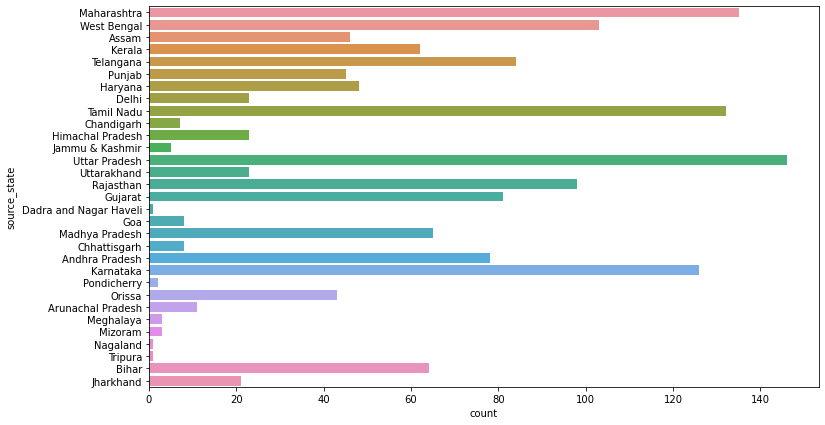

In [129]:
plt.figure(figsize = (12,7))
sns.countplot(data=df_agg,y='source_state')

Delhivery operations based on the source state

<AxesSubplot:xlabel='count', ylabel='destination_state'>

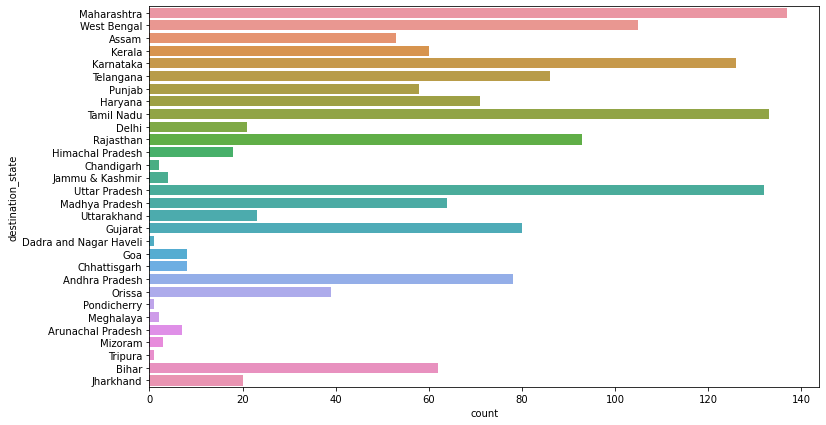

In [130]:
plt.figure(figsize = (12,7))
sns.countplot(data=df_agg,y='destination_state')

Delhivery operations based on the destination state

In [131]:
#Grouping data based on the tripid,source and destination centre
df['merged_id'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

merged_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in merged_cols:
    df[col + '_sum'] = df.groupby('merged_id')[col].cumsum()
    
df[[col + '_sum' for col in merged_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [132]:
element = df.groupby('merged_id').agg(col_data_selection).reset_index()
element = element.sort_values(by=['merged_id','od_end_time'], ascending=True).reset_index()

In [133]:
element

,index,merged_id,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [135]:
#Calculate the time taken between source and destination based on od time 
element['time_taken'] = (element['od_end_time'] - element['od_start_time']).dt.total_seconds()
element['time_taken']/=60

In [136]:
#Dropping the columns as we got the meaningful insight of it
element.drop(['od_end_time','od_start_time'],axis=1,inplace = True)

In [137]:
element

,index,merged_id,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,time_taken
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


In [138]:
create_trip_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',
    'time_taken' : 'sum', 
    
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    
}

In [139]:
#Now extracting the time ,day and relevant datas 
df_trip = element.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [140]:
df_trip[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [174]:


# Ho = Actual time and OSRM generated time are  equal
# Ha = Actual time and OSRM generated time are not equal


# mu1 = avg actual time 
# mu2 = avg OSRM generated time

# # Mathematically:

# Null Hypothesis = mu1 != mu2
# Alternate Hypothesis = mu1 = mu2

# As the standard deviation is not known and the advantage of t test having over z we will use t test 


Actual_time = df_trip['actual_time'].sample(8000)
OSRM_time =  df_trip['segment_actual_time_sum'].sample(8000)

#Standard deviation of samples 
print('Sample standard deviation on actual time :',round(Actual_time.std(),2))
print('Sample standard deviation on osrm time :',round(OSRM_time.std(),2))

alpha = 0.05

test_stat,p_value = ttest_ind(Actual_time,OSRM_time,equal_var=False,alternative='less')
print('p_value :',p_value)

if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Sample standard deviation on actual time : 1.0
Sample standard deviation on osrm time : 1.01
p_value : 0.24779518872223344
As the p-value 0.24779518872223344 is greater than the level of significance, we fail to reject the null hypothesis.


In [141]:
df_trip[['actual_distance_to_destination', 'osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14782,57.762332,73.4630
14783,15.513784,16.0882
14784,38.684839,58.9037
14785,134.723836,171.1103


In [173]:


# Ho = Actual time and OSRM generated distance are  equal
# Ha = Actual time and OSRM generated distance are not equal


# mu1 = avg actual distance 
# mu2 = avg OSRM generated distance

# # Mathematically:

# Null Hypothesis = mu1 != mu2
# Alternate Hypothesis = mu1 = mu2

# As the standard deviation is not known and the advantage of t test having over z we will use t test 


Actual_dist = df_trip['actual_distance_to_destination'].sample(8000)
OSRM_dist =  df_trip['osrm_distance'].sample(8000)

#Standard deviation of samples 
print('Sample standard deviation on actual distance :',round(Actual_dist.std(),2))
print('Sample standard deviation on osrm distance :',round(OSRM_dist.std(),2))

alpha = 0.05

test_stat,p_value = ttest_ind(Actual_dist,OSRM_dist,equal_var=False,alternative='less')
print('p_value :',p_value)

if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Sample standard deviation on actual distance : 1.01
Sample standard deviation on osrm distance : 0.99
p_value : 0.7461837469525769
As the p-value 0.7461837469525769 is greater than the level of significance, we fail to reject the null hypothesis.


In [165]:
a = df_trip['actual_distance_to_destination'].mean()
b = df_trip['osrm_distance'].mean()
print(a,b)

-5.267734688285714e-17 5.696513937460583e-17


In [142]:
#Extract the source city and destination city 
df_trip['source_city'] = element['source_name'].apply(lambda x:x.split('_')[0])
df_trip['destination_city'] = element['destination_name'].apply(lambda x:x.split('_')[0])

df_trip['source_state'] = element['source_name'].str.extract('.*\((.*)\).*')
df_trip['destination_state'] = element['destination_name'].str.extract('.*\((.*)\).*')

In [143]:
#source and destination state and city
df_trip[['source_state','destination_state','source_city','destination_city']]

,source_state,destination_state,source_city,destination_city
0,Uttar Pradesh,Haryana,Kanpur,Gurgaon
1,Madhya Pradesh,Uttar Pradesh,Bhopal,Kanpur
2,Karnataka,Karnataka,Doddablpur,Chikblapur
3,Karnataka,Karnataka,Tumkur,Doddablpur
4,Haryana,Punjab,Gurgaon,Chandigarh
...,...,...,...,...
14782,West Bengal,West Bengal,Purulia,Jhalda
14783,West Bengal,West Bengal,Hura,Purulia
14784,West Bengal,West Bengal,Jhalda,Durgapur
14785,Maharashtra,Gujarat,Bhiwandi,Ahmedabad


In [144]:
#Time extractions
df_trip['trip_creation_time'] = pd.to_datetime(df_trip['trip_creation_time'])

df_trip['trip_year'] = df_trip['trip_creation_time'].dt.year
df_trip['trip_month'] = df_trip['trip_creation_time'].dt.month
df_trip['trip_hour'] = df_trip['trip_creation_time'].dt.hour
df_trip['trip_day'] = df_trip['trip_creation_time'].dt.day
df_trip['trip_week'] = df_trip['trip_creation_time'].dt.isocalendar().week
df_trip['trip_dayofweek'] = df_trip['trip_creation_time'].dt.dayofweek

In [145]:
df_trip[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [146]:
# Removing the outliers on numericals variable

cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'time_taken']





<AxesSubplot:>

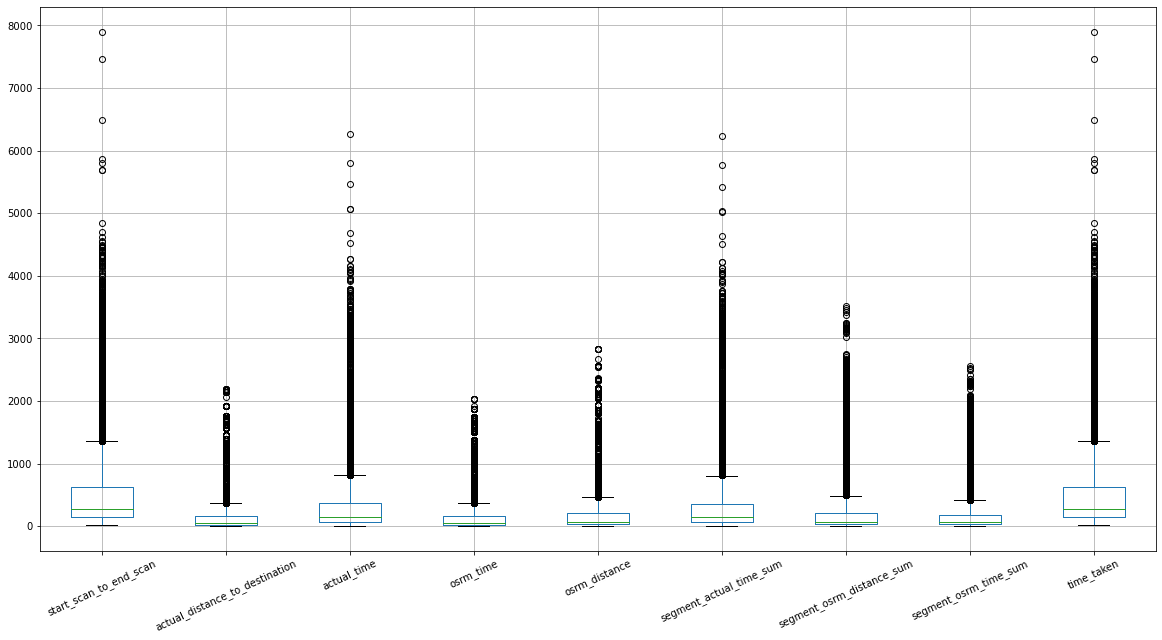

In [147]:
df_trip[cols].boxplot(rot=25, figsize=(20,10))

As we can see outliers are present in the data will IQR method to handle this

In [148]:
Q1 = df_trip[cols].quantile(0.25)
Q3 = df_trip[cols].quantile(0.75)

IQR = Q3 - Q1

In [149]:
df_trip[cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,time_taken
0,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,2260.109800
1,180.0,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,181.611874
2,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,3934.362520
3,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,100.494935
4,717.0,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,718.349042
...,...,...,...,...,...,...,...,...,...
14782,257.0,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0,258.028928
14783,60.0,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0,60.590521
14784,421.0,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0,422.119867
14785,347.0,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0,348.512862


In [151]:
df_trip = df_trip[-((df_trip[cols] < (Q1 - 1.5 * IQR)) | (df_trip[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_trip = df_trip.reset_index(drop=True) 

<AxesSubplot:>

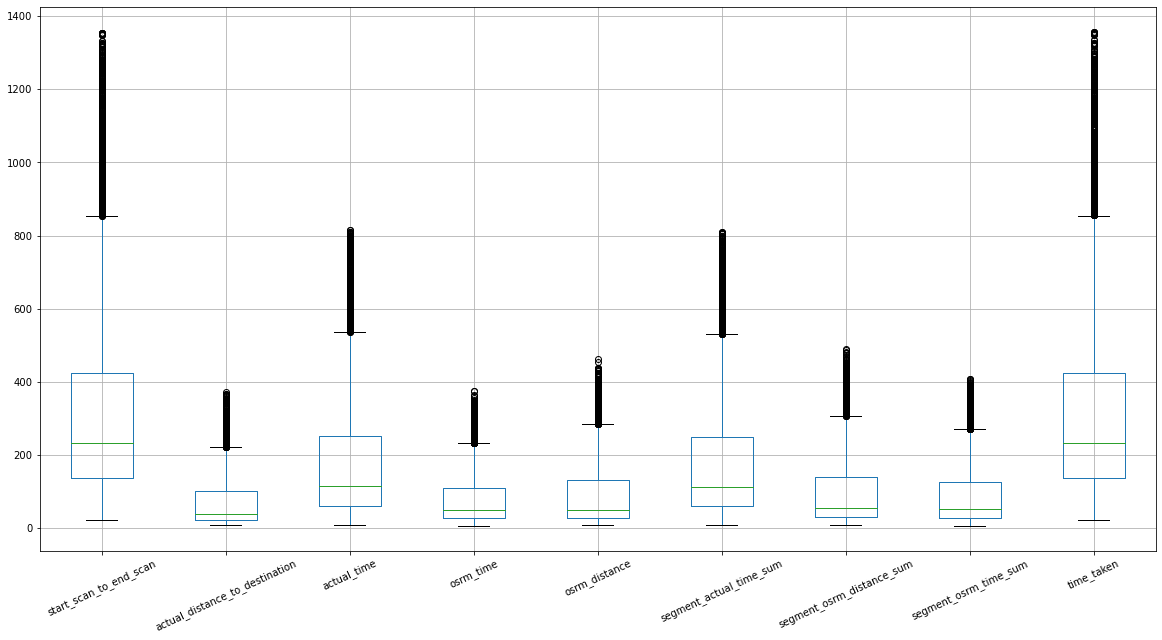

In [152]:
df_trip[cols].boxplot(rot=25, figsize=(20,10))

Now as we can see we have handled the outliers using the IQR method


In [154]:
df_trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_city,destination_city,source_state,destination_state,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,Bhopal,Kanpur,Madhya Pradesh,Uttar Pradesh,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,Tumkur,Doddablpur,Karnataka,Karnataka,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,Gurgaon,Chandigarh,Haryana,Punjab,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),189.0,...,Bangalore,Gurgaon,Karnataka,Haryana,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,...,Mumbai Hub (Maharashtra),Mumbai,Maharashtra,Maharashtra,2018,9,0,12,37,2


In [153]:
#Now handling the categorical values 
df_trip['route_type'].value_counts()

Carting    8812
FTL        3911
Name: route_type, dtype: int64

In [155]:
df_trip['route_type'] = df_trip['route_type'].map({'FTL':0, 'Carting':1})

In [156]:
#Now Normalizing the data using sklearn 

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
stdscler = StandardScaler()
stdscler.fit(df_trip[cols])

StandardScaler()

In [159]:
df_trip[cols] = stdscler.transform(df_trip[cols])

In [161]:
df_trip[cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,time_taken
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


In [163]:
df_trip.describe()

,route_type,start_scan_to_end_scan,time_taken,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
count,12723.000000,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,12723.0,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000
mean,0.692604,-1.808268e-17,-1.496572e-16,-5.267735e-17,-6.830799e-17,7.396469e-17,5.696514e-17,-8.802900e-17,2.966223e-17,1.506301e-16,2018.0,9.121905,12.421677,18.357070,38.300008,2.914171
std,0.461433,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,0.0,0.327189,8.042064,7.923074,0.969422,1.922575
min,0.000000,-1.162918e+00,-1.162915e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-9.375981e-01,-1.003850e+00,2018.0,9.000000,0.000000,1.000000,37.000000,0.000000
25%,0.000000,-7.207269e-01,-7.210516e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.228116e-01,-7.274750e-01,2018.0,9.000000,4.000000,14.000000,38.000000,1.000000
50%,1.000000,-3.411472e-01,-3.418602e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.628077e-01,-4.134119e-01,2018.0,9.000000,14.000000,19.000000,38.000000,3.000000
75%,1.000000,4.023595e-01,4.020802e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.488499e-01,4.910897e-01,2018.0,9.000000,20.000000,25.000000,39.000000,5.000000
max,1.000000,4.049455e+00,4.050310e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.130135e+00,4.046283e+00,2018.0,10.000000,23.000000,30.000000,40.000000,6.000000


In [5]:


# Ho = Actual time and OSRM generated time are  equal
# Ha = Actual time and OSRM generated time are not equal


# mu1 = avg actual time 
# mu2 = avg OSRM generated time

# # Mathematically:

# Null Hypothesis = mu1 != mu2
# Alternate Hypothesis = mu1 = mu2

# As the standard deviation is not known and the advantage of t test having over z we will use t test 


Actual_time = [101,124,89,57,135,98,69,105,114,106,97,121,93,116,102,71,88,108,144,99]
OSRM_time =  [113,127,89,70,127,104,69,127,115,99,104,120,95,129,106,71,94,112,154,96]

#Standard deviation of samples 
# print('Sample standard deviation on actual time :',round(Actual_time.mean(),2))
# print('Sample standard deviation on osrm time :',round(OSRM_time.mean(),2))

alpha = 0.1

test_stat,p_value = ttest_ind(Actual_time,OSRM_time,equal_var=True,alternative='less')
print('p_value :',p_value)

if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

p_value : 0.27148742444387713
As the p-value 0.27148742444387713 is greater than the level of significance, we fail to reject the null hypothesis.
